In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib.dates import DateFormatter

In [158]:
df=pd.read_csv('water_meters.csv')\
    .assign(date_string=lambda d: d['Date'] + ' '+ d['time'])\
    .assign(date_string=lambda d: pd.to_datetime(d['date_string']))
df

,Date,time,Reading,date_string
0,2022-06-08,22:58,84467.29,2022-06-08 22:58:00
1,2022-06-09,6:29,84549.39,2022-06-09 06:29:00
2,2022-06-09,23:14,84655.95,2022-06-09 23:14:00
3,2022-06-10,8:15,84656.36,2022-06-10 08:15:00
4,2022-06-10,21:28,84727.43,2022-06-10 21:28:00
5,2022-06-11,19:13,84774.97,2022-06-11 19:13:00
6,2022-06-12,11:11,84831.26,2022-06-12 11:11:00
7,2022-06-12,19:29,84853.57,2022-06-12 19:29:00


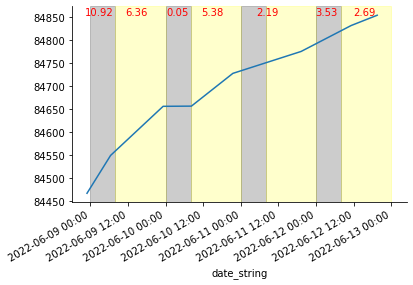

In [170]:
per_hour_usage =  np.diff(df['Reading']) / (np.diff(df['date_string']).astype(float)) * 3.6e12
date_time = df['date_string'][:-1].values + (df['date_string'][1:].values - df['date_string'][:-1].values)/2
ax = plt.subplot()
df.plot('date_string','Reading',ax=ax)
ax.xaxis.set_major_formatter(date_form)
start_time=df['date_string'].values[1].astype('datetime64[D]')
for i in range(df.shape[0]):
    hour_lapse = 8 if i % 2 == 0 else 16 # night and day
    color = "black" if i %  2 == 0 else "yellow"
    ax.axvspan(
        start_time, 
        start_time + np.timedelta64(hour_lapse, 'h'), 
        alpha=0.2,
        color=color,
    )
    start_time = start_time + np.timedelta64(hour_lapse, 'h')
for t, u in zip(date_time, per_hour_usage):
    ax.text(t, df['Reading'].max(), f"{u:.2f}", rotation=0, color='red', ha='center')
ax.legend().set_visible(False)
sns.despine()

In [145]:
df['date_string']

0   2022-06-08 22:58:00
1   2022-06-09 06:29:00
2   2022-06-09 23:14:00
3   2022-06-10 08:15:00
4   2022-06-10 21:28:00
5   2022-06-11 19:13:00
6   2022-06-12 11:11:00
7   2022-06-12 19:29:00
Name: date_string, dtype: datetime64[ns]

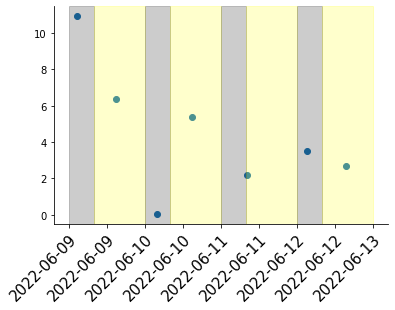

In [140]:
fig=plt.figure()
ax=fig.add_subplot()


ax.scatter(
    date_time, 
    per_hour_usage
)

start_time=df['date_string'].values[1].astype('datetime64[D]')
for i in range(len(date_time)+1):
    hour_lapse = 8 if i % 2 == 0 else 16 # night and day
    color = "black" if i %  2 ==0 else "yellow"
    ax.axvspan(
        start_time, 
        start_time + np.timedelta64(hour_lapse, 'h'), 
        alpha=0.2,
        color=color,
    )
    start_time = start_time + np.timedelta64(hour_lapse, 'h')
sns.despine()
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
    label.set_fontsize(15)
    label.set_ha('right')
    label.set_rotation_mode('anchor')
#(, rotation=70, rotation_mode='anchor', ha='right')
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)


In [139]:
start_time=df['date_string'].values[0].astype('datetime64[D]')
start_time

numpy.datetime64('2022-06-08')